### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [2]:
BASELINE = '../Data/history_file_baseline_2agents.json'
PROD_LOTTERY = '../Data/history_file_product_lottery_2agents.json'
STATIC = '../Data/history_file_static_lottery_2agents.json'
LEAST_FAIR = '../Data/history_file_least_fair_2agents.json'
MOST_COMPAT = '../Data/history_file_most_compatible_2agents.json'
FAIR_LOTTERY = '../Data/history_file_fairness_lottery_2agents.json'


In [4]:
WEIGHTED_LOTTERY = '../Data/history_file_weighted_lottery_2agents.json'
weighted_lottery = []
with jsonlines.open(WEIGHTED_LOTTERY) as reader:
    for obj in reader:
        weighted_lottery.append(obj)

In [5]:
baseline = []
with jsonlines.open(BASELINE) as reader:
    for obj in reader:
        baseline.append(obj)
        
static = []
with jsonlines.open(STATIC) as reader:
    for obj in reader:
        static.append(obj)
        
product_lottery = []
with jsonlines.open(PROD_LOTTERY) as reader:
    for obj in reader:
        product_lottery.append(obj)
        
least_fair = []
with jsonlines.open(LEAST_FAIR) as reader:
    for obj in reader:
        least_fair.append(obj)
        
most_compat = []
with jsonlines.open(MOST_COMPAT) as reader:
    for obj in reader:
        most_compat.append(obj)
        
fair_lottery = []
with jsonlines.open(FAIR_LOTTERY) as reader:
    for obj in reader:
        fair_lottery.append(obj)

fair_lottery = []
with jsonlines.open(FAIR_LOTTERY) as reader:
    for obj in reader:
        fair_lottery.append(obj)
        


In [30]:
most_compat = []
with jsonlines.open(MOST_COMPAT) as reader:
    for obj in reader:
        most_compat.append(obj)
  

Functions to process the history

In [6]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
        alloc_df['none'] = (alloc_df['Agent1'] == 0) & (alloc_df['Agent2'] == 0)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
    
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    
    return [(entry['item'], entry['score']) for entry in result_structs]

        

Get the individual data frames and result lists

In [7]:
fair_df_base, compat_df_base, alloc_df_base, results = process_history(baseline)
fair_df_product_lottery, compat_df_product_lottery, alloc_df_product_lottery, results = process_history(product_lottery)
fair_df_static, compat_df_static, alloc_df_static, results_static = process_history(static)
fair_df_fair_lottery, compat_df_fair_lottery, alloc_df_fair_lottery, results_fair_lottery = process_history(fair_lottery)
fair_df_least_fair, compat_df_least_fair, alloc_df_least_fair, results_least_fair = process_history(least_fair)
fair_df_most_compat, compat_df_most_compat, alloc_df_most_compat, results_most_compat = process_history(most_compat)




In [8]:
static_exp = process_history(static)
most_compat = process_history(most_compat)

In [9]:
fair_df =pd.DataFrame()

In [10]:

#Total sum per row: 
fair_df.loc[:,'Baseline'] = fair_df_base.sum(axis=1)
fair_df.loc[:,'Combined Lottery'] = fair_df_product_lottery.sum(axis=1)
fair_df.loc[:,'Static Lottery'] = fair_df_static.sum(axis=1)
fair_df.loc[:,'Fairness Lottery'] = fair_df_fair_lottery.sum(axis=1)
fair_df.loc[:,'Least Misery'] = fair_df_least_fair.sum(axis=1)
fair_df.loc[:,'Most Compatible'] = fair_df_most_compat.sum(axis=1)

In [11]:
fair_df

,Baseline,Combined Lottery,Static Lottery,Fairness Lottery,Least Misery,Most Compatible
0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,0.533333,1.000000,1.000000,1.000000,0.533333,1.000000
2,0.900000,1.666667,1.666667,1.666667,0.933333,1.000000
3,0.933333,1.555556,1.555556,1.555556,1.288889,1.000000
4,0.816667,1.500000,1.500000,1.500000,1.300000,1.000000
...,...,...,...,...,...,...
995,0.860000,1.004000,1.393333,1.624000,1.606667,0.890000
996,0.873333,1.004000,1.393333,1.617333,1.606667,0.891333
997,0.846667,1.004000,1.393333,1.617333,1.606667,0.889333
998,0.853333,1.004000,1.391333,1.624000,1.540000,0.889333


## Visualizations

Simple plot of the fairness values computed at each iteration

In [12]:
def plot_fairness_time(experiment_data, include_none=False, image_prefix=None):

    fair_df = experiment_data[0]
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Fairness")
    sb.lineplot(data=fair_df)
    image_file = image_prefix + '-fairness.png'
    plt.savefig(image_file)
                

In [13]:
def plot_allocation(experiment_data, include_none=False, image_prefix=None):
    alloc_df = pd.DataFrame(experiment_data[2])
    if include_none is False:
        if not alloc_df['none'][1:].any():
            alloc_df.drop('none', axis=1, inplace=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Allocation")
    sb.lineplot(data=alloc_df.cumsum())
    image_file = image_prefix + '-allocation.png'
    plt.savefig(image_file)

In [14]:
def plot_fairness_regret(experiment_data, include_none=False, image_prefix=None):

    fair_df = experiment_data[0]
    regret = 1-fair_df
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Fairness Regret")
    sb.lineplot(data=regret.cumsum())
    image_file = image_prefix + '-regret.png'
    plt.savefig(image_file)

In [15]:
def do_plots(experiment_data, include_none=False, image_prefix=None):
    plot_fairness_time(experiment_data, include_none, image_prefix)
    plot_allocation(experiment_data, include_none, image_prefix)
    plot_fairness_regret(experiment_data, include_none, image_prefix)
    

In [16]:
def process(experiment, include_none=False, image_prefix=None):
    experiment_data = process_history(experiment)
    
    do_plots(experiment_data, include_none, image_prefix)

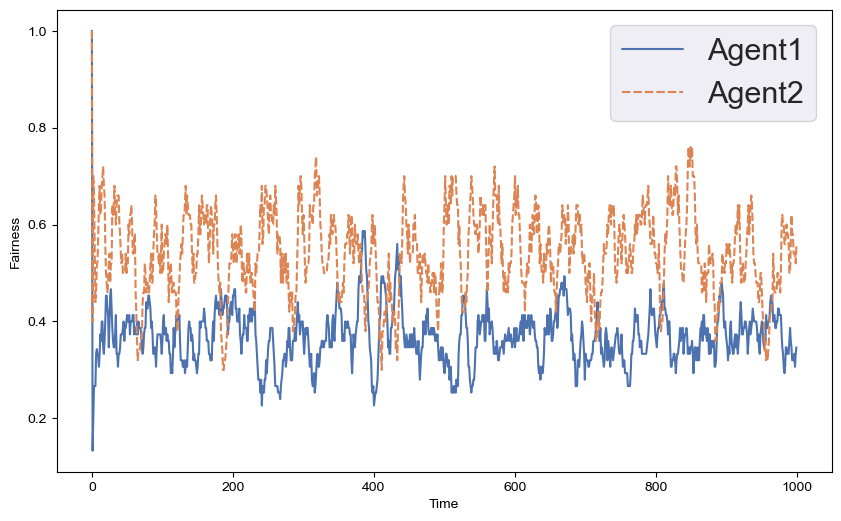

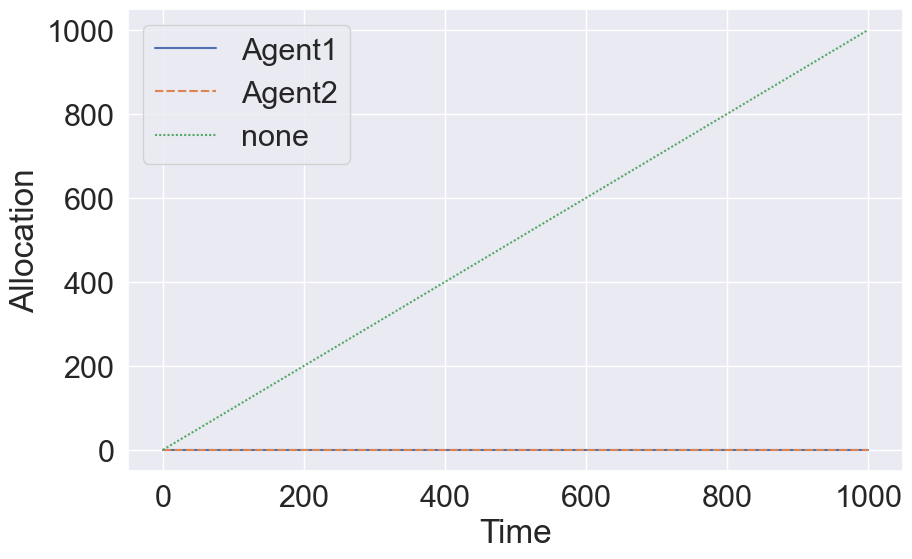

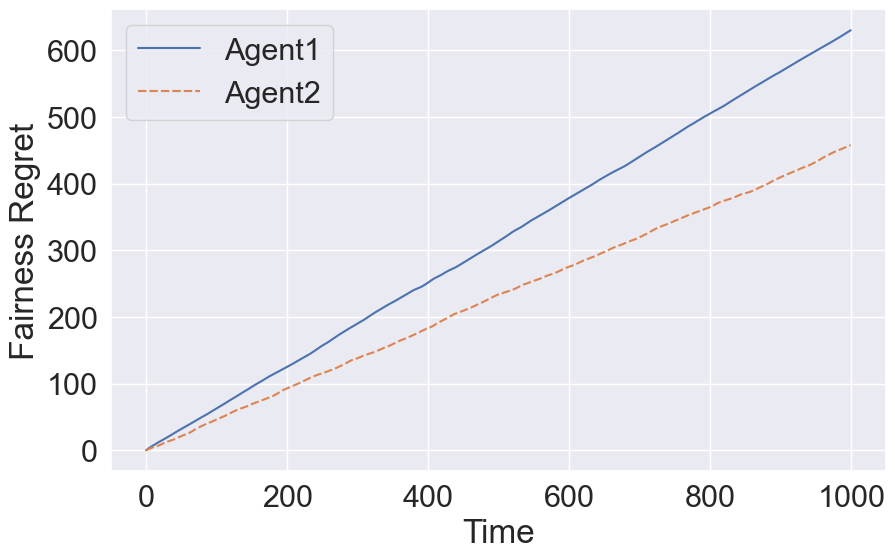

In [17]:
process(baseline, image_prefix='base')

In [37]:
alloc_df_least_fair

,Agent1,Agent2
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,1.0,0.0
997,1.0,0.0
998,0.0,1.0


In [36]:
if not alloc_df_least_fair['none'][1:].any():
    alloc_df_least_fair.drop('none', axis=1, inplace=True)

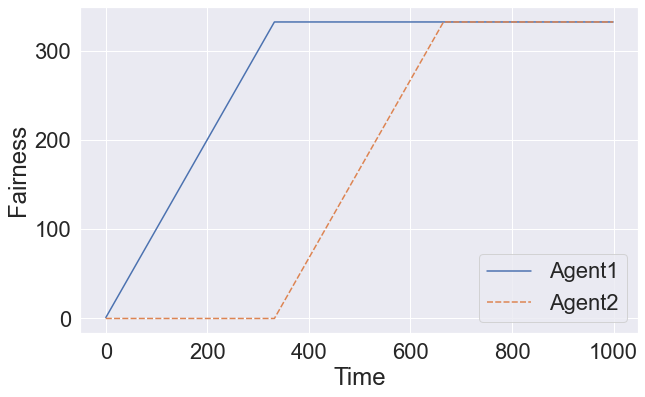

In [111]:
plot_allocation_time(most_compat)

ValueError: Could not interpret input 'Agent'

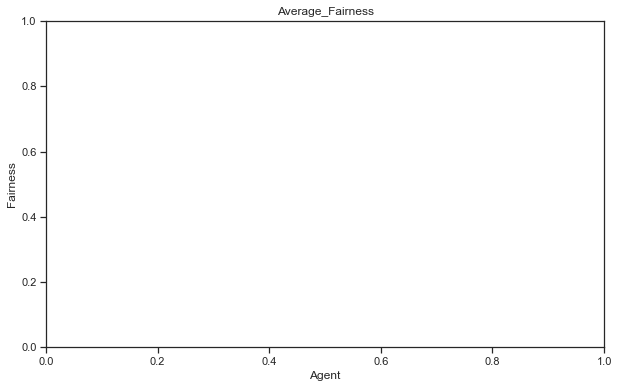

In [25]:
# Set up the plot
sb.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
# Add title and axis labels
ax.set_title("Average_Fairness")
ax.set_xlabel("agent")
ax.set_ylabel("Fairness")
# Draw the boxplot
sb.boxplot(x="agent", y="Fairness", hue="variable", data=fair_df_static, ax=ax)
# Remove unnecessary elements
sb.despine(trim=True, left=True)
# Adjust the aspect ratio
plt.tight_layout()

NameError: name 'fair_df_alloc' is not defined

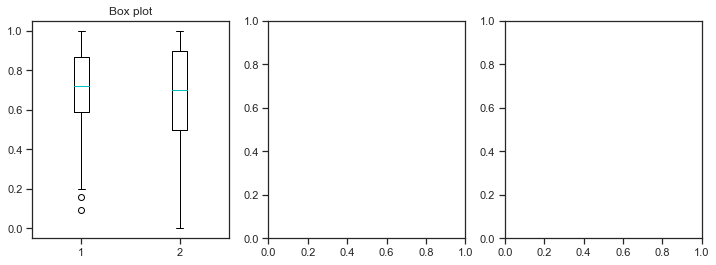

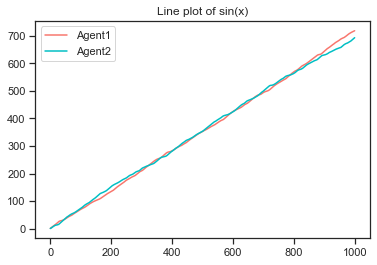

In [ ]:
fair_

<AxesSubplot:>

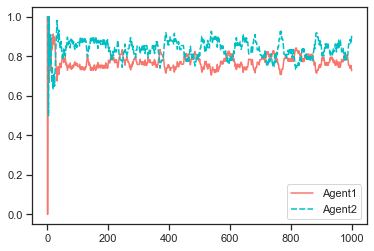

In [72]:
sb.lineplot(data=fair_df_fair_100)

<AxesSubplot:>

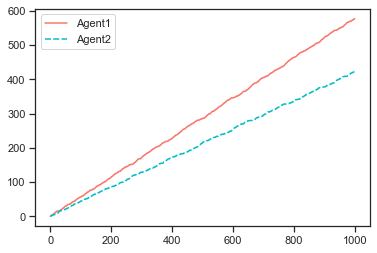

In [73]:
sb.lineplot(data=alloc_df_fair_100.cumsum())

In [59]:
alloc_df_most_compat['none'] = (alloc_df_most_compat['Agent1'] == 0) & (alloc_df_most_compat['Agent2'] == 0)

<AxesSubplot:xlabel='index', ylabel='variable'>

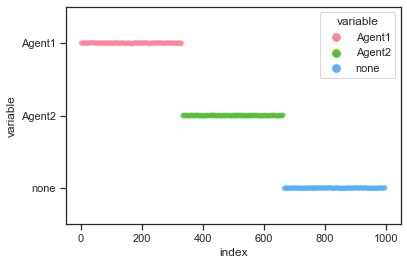

In [61]:
alloc_df_melt = alloc_df_most_compat.reset_index().melt(id_vars=['index'])
alloc_df_melt1 = alloc_df_melt[alloc_df_melt['value']==1]
sb.stripplot(data=alloc_df_melt1, x='index', y='variable', hue='variable', alpha=0.25, jitter=0.01)

In [70]:
1-(fair_df/2)

,Baseline,Product_Lottry,Static_Lottry,Fair_Lottry,Least_Fair,Most_Compatible
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.733333,0.500000,0.500000,0.500000,0.733333,0.500000
2,0.550000,0.166667,0.166667,0.166667,0.533333,0.500000
3,0.533333,0.222222,0.222222,0.222222,0.355556,0.500000
4,0.591667,0.250000,0.250000,0.250000,0.350000,0.500000
...,...,...,...,...,...,...
995,0.570000,0.498000,0.303333,0.188000,0.196667,0.555000
996,0.563333,0.498000,0.303333,0.191333,0.196667,0.554333
997,0.576667,0.498000,0.303333,0.191333,0.196667,0.555333
998,0.573333,0.498000,0.304333,0.188000,0.230000,0.555333


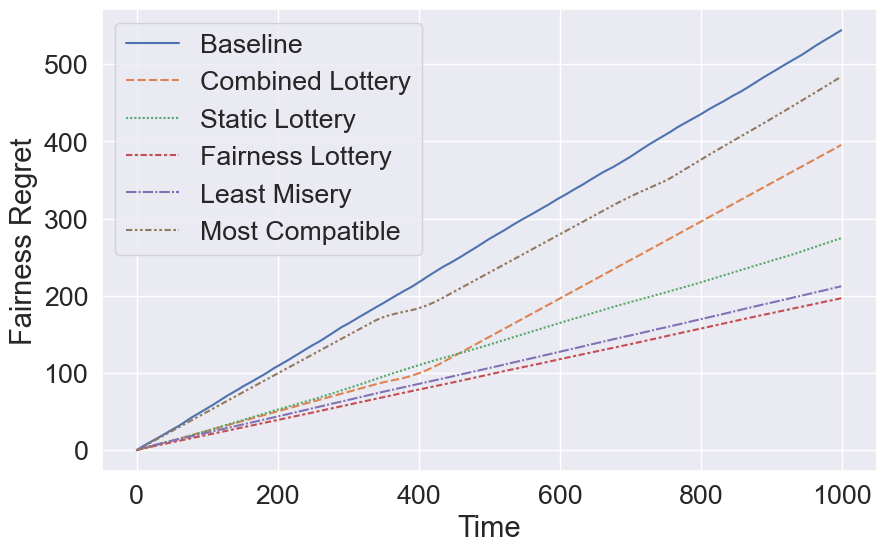

In [89]:
#All algorithms
regret = 1-(fair_df/2)
fig, ax = plt.subplots(figsize=(10, 6))
sb.set(font_scale=1.75)
ax.set_xlabel("Time")
ax.set_ylabel("Fairness Regret")
sb.lineplot(data=regret.cumsum())
fig.savefig('total_fairnessregret.png')

In [35]:
fair_melt = pd.melt(fair_df)

<AxesSubplot:>

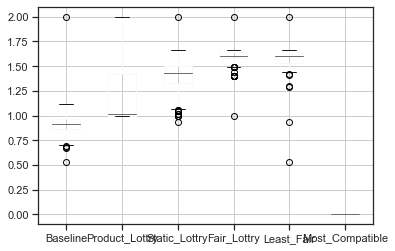

In [77]:
#All algorithms

fair_df.boxplot()

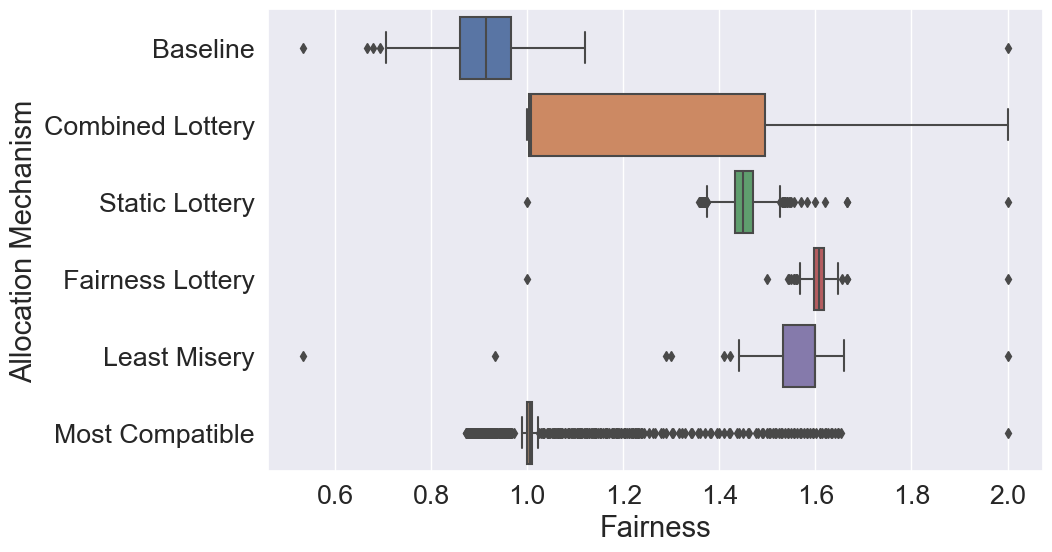

In [90]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
fig, ax = plt.subplots(figsize=(10, 6))
sb.set(font_scale=1.75)
fig = sb.boxplot(data=fair_df_melt, x='value', y='variable', orient='h')
fig.set(xlabel ="Fairness", ylabel = "Allocation Mechanism")
plt.savefig('boxplot_fairness.png')

In [82]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
fair_df_melt

,index,variable,value
0,0,Baseline,2.000000
1,1,Baseline,0.533333
2,2,Baseline,0.900000
3,3,Baseline,0.933333
4,4,Baseline,0.816667
...,...,...,...
5995,995,Most_Compatible,0.000000
5996,996,Most_Compatible,0.000000
5997,997,Most_Compatible,0.000000
5998,998,Most_Compatible,0.000000


Same for allocation

In [ ]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

<AxesSubplot:>

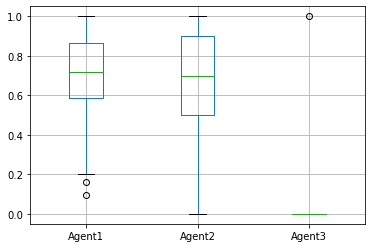

In [35]:
fair_df.boxplot()

ValueError: Could not interpret input 'index'

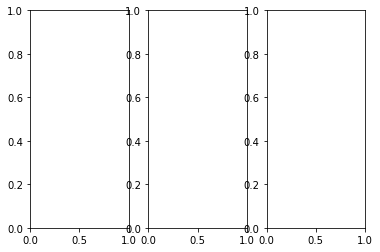

In [30]:
# Store the list of columns
columns_to_plot = ['Agent1','Agent2','Agent3']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sb.boxplot(data=fair_df[column], x='index', y='value', hue = 'variable', ax = axis) 
        axis.set_title(column)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

In [19]:
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

NameError: name 'alloc_df_melt' is not defined

In [ ]:
sb.boxplot(data=alloc_df_melt, x='index', y='value', hue='variable')

In [21]:
item_data = pd.read_csv('../Data/item.csv', header=None)
item_data.columns = ['item', 'agent', 'protected']


In [22]:
item_data = item_data.set_index('item')

In [23]:
# assumes that there's only one protected feature per item
# ok for these experiments
def count_protected(agent, result_entries):
    return sum([1 if item_data.loc[int(result[0]), 'agent'] == agent else 0 for result in result_entries])
    
def count_all_protected(agent, results):
    return sum([count_protected(agent, result_entries) for result_entries in results])

In [32]:
histories = {'baseline': baseline, 
             'least_misery': least_fair,
             'most_compat' : most_compat,
             'static' : static,
             'fair_lottery': fair_lottery,
             'weighted_alloc': weighted_lottery}


def compute_results(history):
    _, _, _, results = process_history(history, fair=False, compat=False, alloc=False, lists=True)
    return results

result_dict = {name: compute_results(history) for name, history in histories.items()}


In [33]:
count_dict0 = {name: count_all_protected(0, results) for name, results in result_dict.items()}

In [34]:
count_dict1 = {name: count_all_protected(1, results) for name, results in result_dict.items()}

In [35]:
count_dict2 = {name: count_all_protected(2, results) for name, results in result_dict.items()}

In [36]:
count_dict1

{'baseline': 2771,
 'least_misery': 6233,
 'most_compat': 4234,
 'static': 5425,
 'fair_lottery': 5752,
 'weighted_alloc': 2507}

In [37]:
count_dict2

{'baseline': 2712,
 'least_misery': 3728,
 'most_compat': 4215,
 'static': 3609,
 'fair_lottery': 4205,
 'weighted_alloc': 7445}

In [38]:
count_df = pd.DataFrame([count_dict0, count_dict1, count_dict2])

In [39]:
count_df

,baseline,least_misery,most_compat,static,fair_lottery,weighted_alloc
0,4517,39,1551,966,43,48
1,2771,6233,4234,5425,5752,2507
2,2712,3728,4215,3609,4205,7445


In [40]:
count_df/10000

,baseline,least_misery,most_compat,static,fair_lottery,weighted_alloc
0,0.4517,0.0039,0.1551,0.0966,0.0043,0.0048
1,0.2771,0.6233,0.4234,0.5425,0.5752,0.2507
2,0.2712,0.3728,0.4215,0.3609,0.4205,0.7445
